<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/ML_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [3]:
!pip install pandas
!pip install seaborn

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [5]:
df = pd.read_csv("/content/crimes_against_women_2001-2014.csv")# чтение файла

In [20]:
describe = df["STATE/UT"].describe(include="all") # ваш код здесь
describe


count             10677
unique               72
top       UTTAR PRADESH
freq                878
Name: STATE/UT, dtype: object

In [21]:
mean = df["Rape"].mean()# (среднее) ваш код здесь
mean

57.98988479910087

In [22]:
median = df["Rape"].median()# (медиана) ваш код здесь
median

22.0

In [23]:
mode = df["Rape"].mode()# (мода) ваш код здесь
mode

0    0
Name: Rape, dtype: int64

In [24]:
min = df["Rape"].min()# (минимум) ваш код здесь
min

0

In [25]:
max = df["Rape"].max()# (максимум) ваш код здесь
max

5076

In [26]:
std = df["Rape"].std()# (стандартное отклонение) Ваш код здесь
std

214.23039847185055

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [29]:
q1 = df["Rape"].quantile(0.25)# (25% квантиль) ваш код здесь
q1

8.0

In [28]:
q2 = df["Rape"].quantile(0.50)# (50% квантиль) ваш код здесь
q2

22.0

In [27]:
q3 = df["Rape"].quantile(0.75)# (75% квантиль) ваш код здесь
q3

44.0

In [30]:
iqr = q3 - q1# (интерквартильный размах) ваш код здесь
iqr

36.0

Какие выводы можно сделать исходя из полученных статистических данных?

**Ответ здесь**

```
Максимальное значение сильно отличается от квантиля 75%, следовательно, присутствует выброс.
```


##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

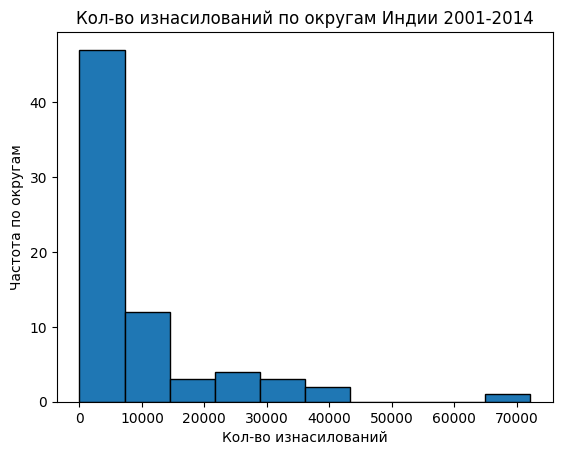

In [42]:

States = list(set(df["STATE/UT"]))
Rape_cnt = [0 for i in range(len(States))]



for i in range(len(df.index)-1):
  cur_state = df.iloc[i]["STATE/UT"]
  for x in States:
    if cur_state == x:
      Rape_cnt[States.index(x)] += df.iloc[i]["Rape"]


'''
rapes_to_state = dict(map(lambda x, y : (x, y), States, Rape_cnt))
rapes_to_state
'''
plt.figure()
plt.hist(Rape_cnt, edgecolor='black')
plt.title('Кол-во изнасилований по округам Индии 2001-2014')
plt.ylabel('Частота по округам')
plt.xlabel('Кол-во изнасилований')
plt.show()



Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

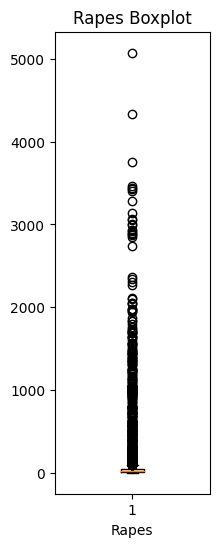

In [46]:
plt.figure(figsize=(2, 6))
plt.boxplot(df['Rape'])
plt.title('Rapes Boxplot')
plt.xlabel('Rapes')
plt.show()

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

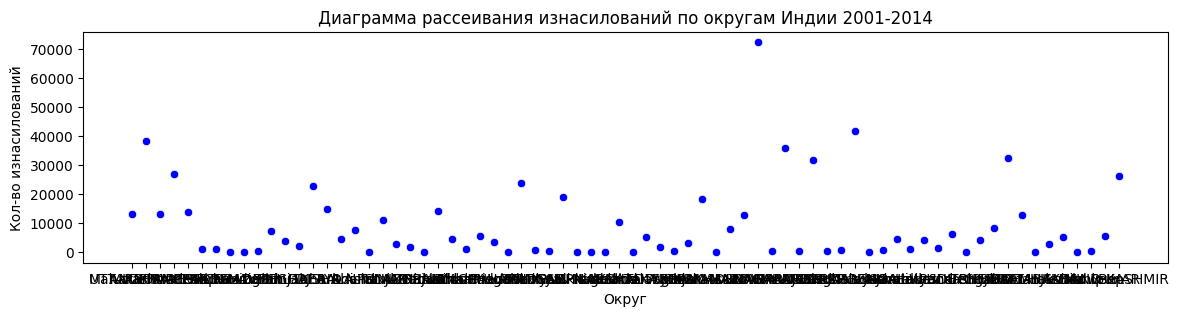

In [50]:
plt.figure(figsize=(14, 3))
sns.scatterplot(x=States, y=Rape_cnt, color='blue')
plt.title('Диаграмма рассеивания изнасилований по округам Индии 2001-2014')
plt.xlabel('Округ')
plt.ylabel('Кол-во изнасилований')
plt.show()

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

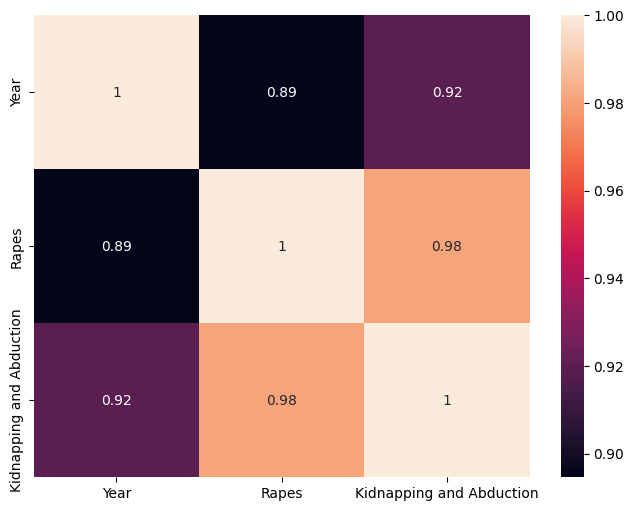

In [69]:
Years = list(set(df["Year"]))
Rapes_by_year = [0 for i in range(len(Years))]
Kidnapping_by_year = [0 for i in range(len(Years))]


for i in range(len(df.index)-1):
  cur_year = df.iloc[i]["Year"]
  for year in Years:
    if cur_year == year:
      Rapes_by_year[Years.index(year)] += df.iloc[i]["Rape"]
      Kidnapping_by_year[Years.index(year)] += df.iloc[i]["Kidnapping and Abduction"]


#rapes_to_year = dict(map(lambda x, y : (x, y), Years, Rape_by_year))
#print(rapes_to_year)

corr_matrix = pd.DataFrame({
    'Year': Years,
    'Rapes': Rapes_by_year,
    'Kidnapping and Abduction': Kidnapping_by_year
}).corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

Количество изнасилований и похищений женщин в Индии росло каждый год
в период с 2001 по 2014 год.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]